<a href="https://colab.research.google.com/github/Phonghuynh66/Artificial-Intelligence-Class/blob/master/CNN_Recognition_Vie_Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Huynh Quoc Phong _ 20149078 
# Nhan dien menh gia tien Vietnam 

In [25]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
folder='/content/drive/MyDrive/Money'
photos,labels=list(),list()

for file in listdir(folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('Tien5k'):
       output=1
     if file.startswith('Tien10k'):
       output=2
     if file.startswith('Tien20k'):
       output=3
     if file.startswith('Tien50k'):
       output=4
     if file.startswith('Tien100k'):
       output=5
     if file.startswith('Tien200k'):
       output=6
     if file.startswith('Tien500k'):
       output=7
     photo=load_img(folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('money_photos.npy',photos)
save('money_labels.npy',labels)

import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
   
classes=7

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

batch_size=32
epochs=30   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1) 

(36, 200, 200, 3) (36,)
X_train: (28, 200, 200, 3)
X_test: (8, 200, 200, 3)
y_train: (28, 7)
y_test: (8, 7)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_poolin

In [58]:
model.save("/content/drive/MyDrive/Money/Money.h5")

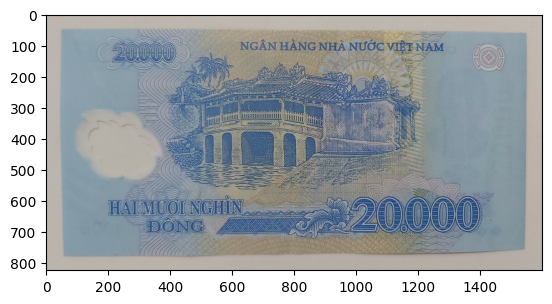

In [59]:
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model("/content/drive/MyDrive/Money/Money.h5")
img=load_img('/content/drive/MyDrive/Money/Tien20k (4).jpg')
plt.imshow(img)
plt.show()

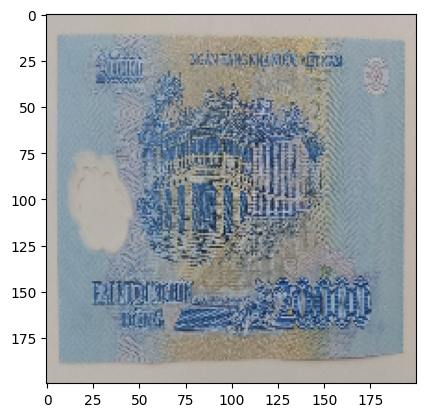

In [60]:
img=load_img('/content/drive/MyDrive/Money/Tien20k (4).jpg',target_size=(200,200))
plt.imshow(img)


In [61]:
class_name = ['Tien5k','Tien10k','Tien20k','Tien50k','Tien100k','Tien200k','Tien500k']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("This is ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 89ms/step
This is  Tien20k [2.5883850e-08 4.7873046e-11 9.9999988e-01 3.3428801e-15 6.7977602e-08
 2.1431031e-11 5.8060896e-11]
0.9999999


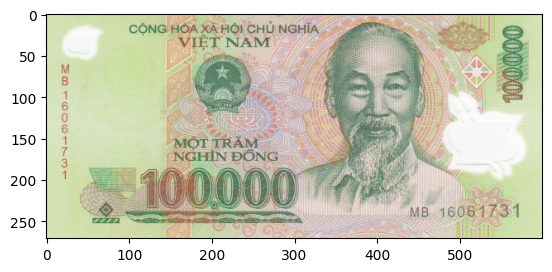

1/1 [==============================] - 0s 21ms/step
This is  Tien100k [1.6654435e-19 2.7571127e-07 1.3210884e-18 9.6532455e-14 9.9999976e-01
 1.7759922e-12 4.9643785e-13]
0.99999976


In [62]:
img1=load_img('/content/drive/MyDrive/Money/Tien100k (5).jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/Money/Tien100k (5).jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("This is ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

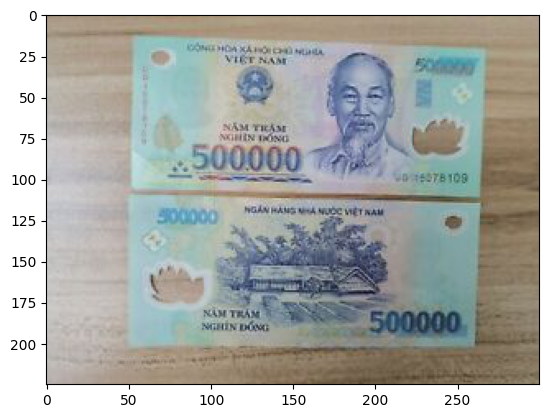

1/1 [==============================] - 0s 27ms/step
This is  Tien500k [2.7346073e-10 9.2831042e-06 1.2410419e-05 1.4884123e-09 1.0695461e-05
 3.6643567e-11 9.9996758e-01]
0.9999676


In [65]:
img2=load_img('/content/drive/MyDrive/Money/Tien500k (2).jpg')
plt.imshow(img2)
plt.show()

img2=load_img('/content/drive/MyDrive/Money/Tien500k (2).jpg',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("This is ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))